1.
Cree una función llamada myint pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con int(0b1000011100001)

In [1]:
def myint(bin_string):
    """
    Convierte una cadena binaria de 16 bits en un entero.
    bin_string: cadena de 16 caracteres, e.g., '0000000001000010'
    Retorna: entero correspondiente
    """
    bin_string = bin_string.strip()  # quitar espacios si los hay

    if len(bin_string) != 16 or not set(bin_string).issubset({'0', '1'}):
        raise ValueError("La cadena debe ser binaria y tener exactamente 16 bits.")

    decimal = 0
    for i, bit in enumerate(reversed(bin_string)):
        if bit == '1':
            decimal += 2**i
    return decimal

# Ejemplo de uso
binario = '0000001000010001'  # representa 0b1000010001
mi_resultado = myint(binario)
esperado = int(0b1000010001)

print(f"Resultado de myint: {mi_resultado}")
print(f"Resultado con int(): {esperado}")
print(f"¿Coinciden?: {mi_resultado == esperado}")

Resultado de myint: 529
Resultado con int(): 529
¿Coinciden?: True


2.
Generar una función llamada number64 para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

number64("0100000000111011100100001111111111111111111111111111111111111111")

In [2]:
def number64(bin_string):
    """
    Convierte una cadena binaria de 64 bits a un número flotante de doble precisión (IEEE 754).
    """
    if len(bin_string) != 64 or not set(bin_string).issubset({'0', '1'}):
        raise ValueError("La cadena debe tener exactamente 64 bits binarios.")

    s = int(bin_string[0], 2)  # signo
    e = int(bin_string[1:12], 2)  # exponente
    m_bits = bin_string[12:]  # 52 bits de la mantisa

    # Convertir la mantisa binaria en fracción decimal
    mantisa = 0
    for i, bit in enumerate(m_bits):
        if bit == '1':
            mantisa += 2**(-(i + 1))

    # Casos especiales: infinito, NaN o subnormal
    if e == 2047:
        if mantisa == 0:
            return float('inf') if s == 0 else float('-inf')
        else:
            return float('nan')
    elif e == 0:  # subnormal
        real = (-1)**s * (mantisa) * 2**(-1022)
    else:
        real = (-1)**s * (1 + mantisa) * 2**(e - 1023)

    return real
bin64 = "0100000000111011100100001111111111111111111111111111111111111111"
resultado = number64(bin64)
print("Resultado:", resultado)

Resultado: 27.566406249999996


3. Aproximación de π

La serie de Maclaurin para la función tangente inversa converge en −1<x≤1
 y está dada por:

 arctanx=limn→∞Pn(x)=limn→∞∑i=1n(−1)^i+1 (x^(2i−1))/(2i−1)

 Aproximación básica

Utilizando el hecho de que tan(π/4)=1, implemente en Python una función que calcule 4Pn(1) y determina el número mínimo de términos n
 necesarios para que |4Pn(1)−π|<10^−3. Compare su resultado con el valor de π
 de la librería math. Requiriendo que el valor de π
 esté dentro de un error de 10^−4. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.

 Mejora de la convergencia El método anterior puede mejorarse significativamente usando la identidad:
π4=arctan(1/2)+arctan(1/3)
Implemente en Python una función que evalúe la serie para arctan(1/2)
 y arctan(1/3) por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar π
 con un error menor a 10^−3 y 10^−6.

 Método de alta precisión Para obtener una convergencia aún más rápida usamos la identidad:
π4=4arctan(1/5)−arctan(1/239)
Desarrolle un programa en Python que implemente esta fórmula y determine:
El número mínimo de términos necesarios en cada serie para aproximar π
 con error menor a 10^−3 y 10^−6.
Compare el rendimiento (número de términos requeridos) con los métodos anteriores.

In [3]:
#primera parte
import math

def arctan_series(x, tol=1e-6):
    """
    Calcula arctan(x) mediante su serie de Maclaurin con tolerancia dada.
    Retorna el valor aproximado y el número de términos usados.
    """
    result = 0.0
    term = x
    i = 1
    n = 0
    while abs(term) > tol:
        term = ((-1)**(i+1)) * (x**(2*i - 1)) / (2*i - 1)
        result += term
        i += 1
        n += 1
    return result, n

# Aproximar π con arctan(1)
def pi_approximation_arctan1(tol):
    approx, n = arctan_series(1, tol/4)  # divide tol entre 4 porque se multiplica por 4
    return 4 * approx, n

# Comparaciones
pi_lib = math.pi

# Para error < 1e-3
pi_est1, n1 = pi_approximation_arctan1(1e-3)
# Para error < 1e-4
pi_est2, n2 = pi_approximation_arctan1(1e-4)

print(f"Error < 1e-3: π ≈ {pi_est1:.6f} con {n1} términos")
print(f"Error < 1e-4: π ≈ {pi_est2:.6f} con {n2} términos")

#segunda parte
def pi_approximation_sum_arctan(tol):
    target_error = tol / 4

    def arctan_sum_terms(x, tol):
        result = 0.0
        term = x
        i = 1
        n = 0
        while abs(term) > tol:
            term = ((-1)**(i+1)) * (x**(2*i - 1)) / (2*i - 1)
            result += term
            i += 1
            n += 1
        return result, n

    atan1_2, n1 = arctan_sum_terms(1/2, target_error)
    atan1_3, n2 = arctan_sum_terms(1/3, target_error)

    pi_est = 4 * (atan1_2 + atan1_3)
    return pi_est, n1, n2

# Comparación para error < 1e-3 y 1e-6
pi13_1e3, n13_1, n13_2 = pi_approximation_sum_arctan(1e-3)
pi13_1e6, m13_1, m13_2 = pi_approximation_sum_arctan(1e-6)

print(f"Error < 1e-3: π ≈ {pi13_1e3:.6f} con n1={n13_1}, n2={n13_2}")
print(f"Error < 1e-6: π ≈ {pi13_1e6:.10f} con n1={m13_1}, n2={m13_2}")

#tercera parte
def pi_machin(tol):
    target_error = tol / 4

    def arctan_series_fixed(x, tol):
        result = 0.0
        term = x
        i = 1
        n = 0
        while abs(term) > tol:
            term = ((-1)**(i+1)) * (x**(2*i - 1)) / (2*i - 1)
            result += term
            i += 1
            n += 1
        return result, n

    a1, n1 = arctan_series_fixed(1/5, target_error/4)
    a2, n2 = arctan_series_fixed(1/239, target_error)

    pi_est = 4 * (4 * a1 - a2)
    return pi_est, n1, n2

# Para errores <1e-3 y <1e-6
pi_mach_1e3, n_mach_1, n_mach_2 = pi_machin(1e-3)
pi_mach_1e6, m_mach_1, m_mach_2 = pi_machin(1e-6)

print(f"Machin Error < 1e-3: π ≈ {pi_mach_1e3:.6f}, n1={n_mach_1}, n2={n_mach_2}")
print(f"Machin Error < 1e-6: π ≈ {pi_mach_1e6:.10f}, n1={m_mach_1}, n2={m_mach_2}")

Error < 1e-3: π ≈ 3.142092 con 2001 términos
Error < 1e-4: π ≈ 3.141643 con 20001 términos
Error < 1e-3: π ≈ 3.141719 con n1=5, n2=4
Error < 1e-6: π ≈ 3.1415925965 con n1=10, n2=7
Machin Error < 1e-3: π ≈ 3.141592, n1=4, n2=2
Machin Error < 1e-6: π ≈ 3.1415926824, n1=5, n2=2


4. Serie Exponencial
Considere la serie para e^−x:

e^−x=∑n=0N(−1)^n (x^n)/n!

a) Calcula la serie para x≤1 y compárela con la función incorporada np.exp(x) (asuma que la función exponencial incorporada es exacta). Elegir un N para el cual el siguiente término en la serie no sea más que 10^−7 de la suma hasta ese punto.

∣((−x)^(N+1))/((N+1)!)∣ ≤ ∣10^−7∑N=0N(−x)^n/n!∣

b) Examine los términos de la serie para x≈10 y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en n≈x−1.

c) Compruebe si se obtiene una mejor precisión siendo ingenioso y usando e^−x=1/e^x para valores grandes de x. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.

d) Incrementando progresivamente x de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.

e) Realice una serie de gráficos del error versus N para diferentes valores de x.

Aproximación: 0.6065306594552606, términos usados: 9, valor exacto: 0.6065306597126334
Términos de la serie para x = 10
n = 0: 1
n = 1: -10.0
n = 2: 50.0
n = 3: -166.66666666666669
n = 4: 416.66666666666674
n = 5: -833.3333333333335
n = 6: 1388.8888888888891
n = 7: -1984.1269841269846
n = 8: 2480.1587301587306
n = 9: -2755.7319223985896
n = 10: 2755.7319223985896
n = 11: -2505.2108385441725
n = 12: 2087.6756987868107
n = 13: -1605.9043836821622
n = 14: 1147.074559772973
n = 15: -764.716373181982
n = 16: 477.94773323873875
n = 17: -281.1457254345522
n = 18: 156.19206968586235
n = 19: -82.20635246624333
n = 20: 41.103176233121665
n = 21: -19.57294106339127
n = 22: 8.896791392450577
n = 23: -3.8681701706306857
n = 24: 1.611737571096119
n = 25: -0.6446950284384476
n = 26: 0.24795962632247986
n = 27: -0.0918368986379555
n = 28: 0.03279889237069839
n = 29: -0.011309962886447722
n = 30: 0.003769987628815907
Serie directa: 4.5399929990200534e-05
Alternativa estable (1/exp(x)): 4.53999297624848

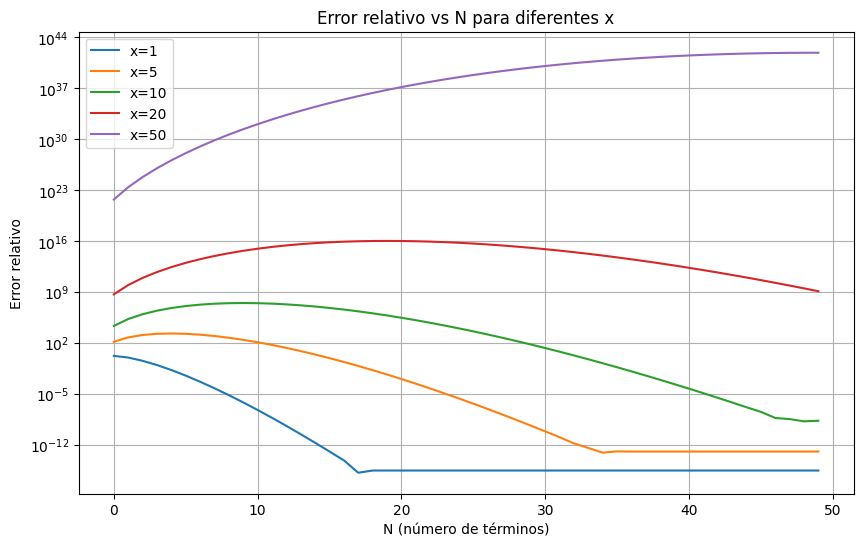

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

# a) Aproximación de e^(-x) para x <= 1
def exp_neg_series(x, tol=1e-7):
    n = 0
    term = 1  # Primer término (x^0 / 0!) = 1
    sum_series = term
    terms = [term]

    while True:
        n += 1
        term *= -x / n  # siguiente término
        sum_series += term
        terms.append(term)

        if abs(term) <= tol * abs(sum_series):
            break

    return sum_series, n, terms

# b) Examinar cancelaciones sustractivas en x ~ 10
def print_terms(x, max_n=30):
    print(f"Términos de la serie para x = {x}")
    term = 1
    print(f"n = 0: {term}")
    for n in range(1, max_n + 1):
        term *= -x / n
        print(f"n = {n}: {term}")

# c) Comparar con 1 / exp(x)
def stable_exp_neg(x):
    return 1 / math.exp(x)

# d) Estudio experimental de pérdida de precisión
def test_precision(x_values, max_n=100):
    print(f"{'x':>5} | {'Direct':>12} | {'Stable':>12} | {'Exact':>12} | {'Rel. Error':>12}")
    print("-" * 65)
    for x in x_values:
        approx, _, _ = exp_neg_series(x)
        stable = stable_exp_neg(x)
        exact = math.exp(-x)
        rel_error = abs(approx - exact) / exact if exact != 0 else float('inf')
        print(f"{x:5} | {approx:12.4e} | {stable:12.4e} | {exact:12.4e} | {rel_error:12.4e}")

# e) Graficar error vs N para distintos x
def plot_error_vs_n(x_values, max_n=50):
    plt.figure(figsize=(10, 6))

    for x in x_values:
        true_val = math.exp(-x)
        sum_series = 0
        term = 1
        errors = []
        for n in range(max_n):
            if n > 0:
                term *= -x / n
            sum_series += term
            rel_error = abs(sum_series - true_val) / abs(true_val)
            errors.append(rel_error)

        plt.plot(range(max_n), errors, label=f"x={x}")

    plt.yscale("log")
    plt.xlabel("N (número de términos)")
    plt.ylabel("Error relativo")
    plt.title("Error relativo vs N para diferentes x")
    plt.legend()
    plt.grid(True)
    plt.show()

# a) Para x <= 1
approx, terms_used, terms = exp_neg_series(0.5)
print(f"Aproximación: {approx}, términos usados: {terms_used}, valor exacto: {math.exp(-0.5)}")

# b) Términos para x = 10 (ver cancelaciones)
print_terms(10)

# c) Comparación con método más estable
x = 10
print(f"Serie directa: {exp_neg_series(x)[0]}")
print(f"Alternativa estable (1/exp(x)): {stable_exp_neg(x)}")
print(f"Valor exacto: {math.exp(-x)}")

# d) Evaluación de precisión para x de 1 a 100
x_values = list(range(1, 101, 10))
test_precision(x_values)

# e) Gráfico de error vs N para distintos x
plot_error_vs_n([1, 5, 10, 20, 50])

5.
Supongamos que tenemos una función f(x) y queremos calcular su derivada en un punto x. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

df/dx=limδ→0 (f(x+δ)−f(x))/δ.

En el computador no podemos tomar el límite cuando δ
 tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de δ.

Escriba un programa que:

a)Defina una función f(x) que retorne el valor x(x−1)
b)Calcule la derivada de la función en x=1 usando la fórmula anterior con δ=10^−2
c)Compare este resultado con el valor exacto obtenido analíticamente
Los resultados no coincidirán exactamente. ¿Por qué?

d)Repita el cálculo para δ=10^−4,10^−6,10^−8,10^−10,10^−12, y 10^−14. Observará que la precisión mejora inicialmente al disminuir δ, pero luego empeora. Explique este comportamiento.

In [6]:
import numpy as np

# a) Definir función f(x) = x(x - 1)
def f(x):
    return x * (x - 1)

# b) Derivada numérica usando definición de límite
def derivada_numerica(f, x, delta):
    return (f(x + delta) - f(x)) / delta

# c) Derivada analítica exacta de f(x) = x(x - 1) => f'(x) = 2x - 1
def derivada_analitica(x):
    return 2 * x - 1

# Comparación para múltiples valores de delta
x0 = 1
delta_vals = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
deriv_exacta = derivada_analitica(x0)

print(f"{'Delta':>10} | {'Aproximada':>12} | {'Exacta':>8} | {'Error Absoluto':>16}")
print("-" * 50)

for delta in delta_vals:
    deriv_aprox = derivada_numerica(f, x0, delta)
    error = abs(deriv_aprox - deriv_exacta)
    print(f"{delta:10.0e} | {deriv_aprox:12.8f} | {deriv_exacta:8.2f} | {error:16.8e}")

     Delta |   Aproximada |   Exacta |   Error Absoluto
--------------------------------------------------
     1e-02 |   1.01000000 |     1.00 |   1.00000000e-02
     1e-04 |   1.00010000 |     1.00 |   9.99999999e-05
     1e-06 |   1.00000100 |     1.00 |   9.99917733e-07
     1e-08 |   1.00000000 |     1.00 |   3.92252875e-09
     1e-10 |   1.00000008 |     1.00 |   8.28403710e-08
     1e-12 |   1.00008890 |     1.00 |   8.89005833e-05
     1e-14 |   0.99920072 |     1.00 |   7.99277837e-04
